In [ ]:
1

In [ ]:
import numpy as np

def logistic_function(x):
    """Compute the logistic (sigmoid) function"""
    return 1 / (1 + np.exp(-x))


def test_logistic_function():
    # Scalar tests
    assert np.isclose(logistic_function(0), 0.5)
    assert np.isclose(logistic_function(2), 0.880797, atol=1e-3)
    assert np.isclose(logistic_function(-3), 0.047426, atol=1e-3)

    # Array test
    x = np.array([0, 2, -3])
    expected = np.array([0.5, 0.880797, 0.047426])
    assert np.allclose(logistic_function(x), expected, atol=1e-3)

    print("All tests passed!")


# Run tests
test_logistic_function()

All tests passed!


2

In [ ]:
import numpy as np

# Logistic Function
def logistic_function(x):
    """Compute the logistic (sigmoid) function"""
    return 1 / (1 + np.exp(-x))


# Log Loss Function
def log_loss(y_true, y_pred):
    """Compute binary log loss"""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Avoid log(0)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


#  Test Functions
def test_logistic_function():
    # Scalar tests
    assert np.isclose(logistic_function(0), 0.5)
    assert np.isclose(logistic_function(2), 0.880797, atol=1e-3)
    assert np.isclose(logistic_function(-3), 0.047426, atol=1e-3)

    # Array test
    x = np.array([0, 2, -3])
    expected = np.array([0.5, 0.880797, 0.047426])
    assert np.allclose(logistic_function(x), expected, atol=1e-3)
    print("Logistic function tests passed!")


def test_log_loss():
    # Perfect predictions
    assert np.isclose(log_loss(1, 1), 0.0)
    assert np.isclose(log_loss(0, 0), 0.0)

    # Partially correct predictions
    assert np.isclose(log_loss(1, 0.8), -np.log(0.8))
    assert np.isclose(log_loss(0, 0.2), -np.log(0.8))

    # Very wrong predictions (large loss)
    assert log_loss(1, 0) > 10
    assert log_loss(0, 1) > 10
    print("Log loss tests passed!")


# Run All Tests
test_logistic_function()
test_log_loss()


Logistic function tests passed!
Log loss tests passed!


3

In [ ]:
import numpy as np

# -------- Logistic Function --------
def logistic(x):
    """Compute the sigmoid (logistic) function"""
    return 1 / (1 + np.exp(-x))

# -------- Log Loss (single prediction) --------
def log_loss(y_true, y_pred):
    """Binary log loss for scalar prediction"""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# -------- Cost Function (average log loss) --------
def cost(y_true, y_pred):
    """Average log loss for arrays of predictions"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return np.mean(-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))

# -------- Tests --------
def run_tests():
    # Logistic function tests
    assert np.isclose(logistic(0), 0.5)
    assert np.isclose(logistic(2), 0.880797, atol=1e-3)
    assert np.isclose(logistic(-3), 0.047426, atol=1e-3)

    # Log loss tests
    assert np.isclose(log_loss(1, 0.9), -np.log(0.9))
    assert np.isclose(log_loss(0, 0.1), -np.log(0.9))

    # Cost function tests
    y_true = [1, 0, 1]
    y_pred = [0.9, 0.1, 0.8]
    expected = np.mean([log_loss(yt, yp) for yt, yp in zip(y_true, y_pred)])
    assert np.isclose(cost(y_true, y_pred), expected)

    print("All tests passed!")

# Run all tests
run_tests()

All tests passed!


4

In [ ]:
import numpy as np

# Logistic function
def logistic(x):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-x))

# Cost function for multiple predictions
def cost(y_true, y_pred):
    """Average binary log loss"""
    y_true = np.array(y_true)
    y_pred = np.clip(np.array(y_pred), 1e-10, 1 - 1e-10)
    return np.mean(-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))

# Vectorized logistic regression cost
def cost_logreg(X, y, w, b):
    """
    Compute logistic regression cost given data and model parameters.
    X : ndarray (m,n) -> features
    y : array (m,) -> true labels
    w : array (n,) -> weights
    b : float -> bias
    """
    # Compute linear combination
    z = np.dot(X, w) + b
    # Predictions using sigmoid
    y_pred = logistic(z)
    # Return average log loss
    return cost(y, y_pred)

# -------- Testing --------
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

print(f"Logistic regression cost = {cost_logreg(X, y, w, b):.6f}")

Logistic regression cost = 5.500008


5

In [ ]:
import numpy as np

# Logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Compute gradients for logistic regression
def compute_gradient(X, y, w, b):
    """
    Computes gradients of logistic regression cost w.r.t weights and bias.

    X : ndarray (n,d) -> features
    y : array (n,) -> true labels
    w : array (d,) -> weights
    b : float -> bias

    Returns:
        grad_w : array (d,) -> gradient w.r.t weights
        grad_b : float -> gradient w.r.t bias
    """
    n = X.shape[0]
    # Predictions
    y_pred = logistic(np.dot(X, w) + b)
    # Error
    error = y_pred - y
    # Gradients
    grad_w = (X.T @ error) / n
    grad_b = np.sum(error) / n
    return grad_w, grad_b

# -------- Test --------
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

grad_w, grad_b = compute_gradient(X, y, w, b)
print("Gradients computed successfully:")
print(f"grad_w: {grad_w}")
print(f"grad_b: {grad_b}")


Gradients computed successfully:
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


6

Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 999: Cost = 0.460693

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460693
All tests passed!


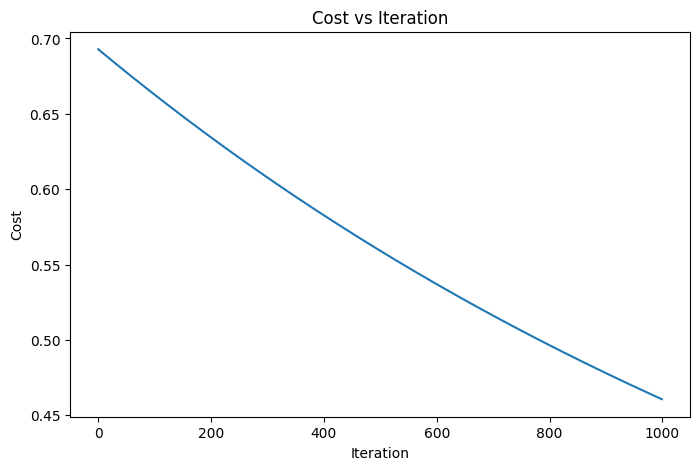

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Logistic function --------
def logistic(x):
    return 1 / (1 + np.exp(-x))

# -------- Cost function --------
def cost_logreg(X, y, w, b):
    y_pred = logistic(np.dot(X, w) + b)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return np.mean(-(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))

# -------- Gradient computation --------
def compute_gradient(X, y, w, b):
    n = X.shape[0]
    y_pred = logistic(np.dot(X, w) + b)
    error = y_pred - y
    grad_w = (X.T @ error) / n
    grad_b = np.sum(error) / n
    return grad_w, grad_b

# -------- Gradient Descent --------
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = cost_logreg(X, y, w, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return w, b, cost_history

# -------- Test and run --------
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

w_out, b_out, cost_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True)

print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

# -------- Simple assertion test --------
def test_gradient_descent():
    w_init = np.zeros(X.shape[1])
    b_init = 0.0
    w_res, b_res, cost_hist = gradient_descent(X, y, w_init, b_init, 0.1, 100, show_cost=False)
    assert len(cost_hist) == 100
    assert w_res.shape == w_init.shape
    assert isinstance(b_res, float)
    assert cost_hist[-1] < cost_hist[0]
    print("All tests passed!")

test_gradient_descent()

# -------- Plot cost --------
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()

7

In [ ]:
import numpy as np

# Logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Predict binary outcomes
def predict(X, w, b, threshold=0.5):
    """Predict class labels (0 or 1) using logistic regression parameters"""
    y_prob = logistic(np.dot(X, w) + b)
    return (y_prob >= threshold).astype(int)

# -------- Test --------
def test_predict():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    expected = np.array([0, 1, 1])
    y_pred = predict(X_test, w_test, b_test)
    assert np.array_equal(y_pred, expected), f"Expected {expected}, got {y_pred}"
    print("Test passed!")

test_predict()

Test passed!


8

In [ ]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Compute confusion matrix, precision, recall, and F1-score for binary classification.

    y_true : array-like, true labels (0 or 1)
    y_pred : array-like, predicted labels (0 or 1)

    Returns:
        dict: confusion_matrix, precision, recall, F1-score
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    return {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

# -------- Example Test --------
y_true = np.array([1, 0, 1, 0, 1])
y_pred = np.array([1, 0, 0, 0, 1])
metrics = evaluate_classification(y_true, y_pred)
print(metrics)


{'confusion_matrix': array([[2, 0],
       [1, 2]]), 'precision': np.float64(1.0), 'recall': np.float64(0.6666666666666666), 'f1_score': np.float64(0.8)}


Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


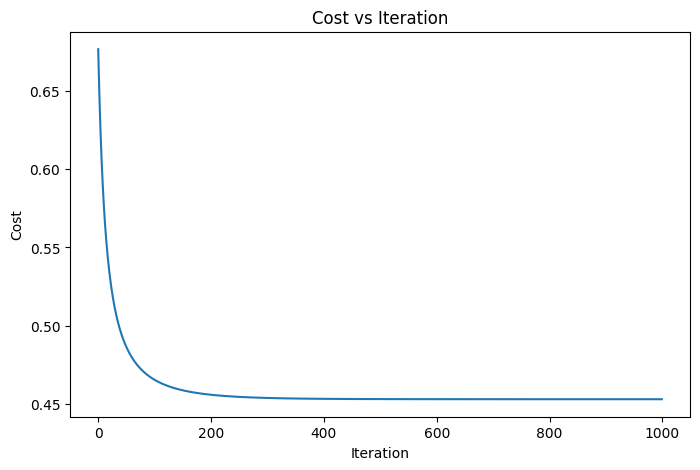


Train Loss: 0.4531, Test Loss: 0.5146
Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


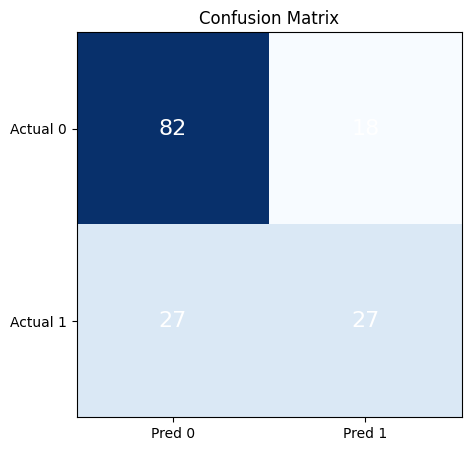

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------- Logistic Regression Functions --------
def logistic(x):
    return 1 / (1 + np.exp(-x))

def cost_logreg(X, y, w, b):
    y_pred = logistic(np.dot(X, w) + b)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return np.mean(-(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))

def compute_gradient(X, y, w, b):
    n = X.shape[0]
    error = logistic(np.dot(X, w) + b) - y
    return (X.T @ error) / n, np.sum(error) / n

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = cost_logreg(X, y, w, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return w, b, cost_history

def predict(X, w, b, threshold=0.5):
    return (logistic(np.dot(X, w) + b) >= threshold).astype(int)

def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    confusion_matrix = np.array([[TN, FP], [FN, TP]])
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    return {"confusion_matrix": confusion_matrix, "precision": precision, "recall": recall, "f1_score": f1_score}

# -------- Load and clean dataset --------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv(url, names=columns)

# Replace zeros with median for selected columns
cols_to_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols_to_clean] = data[cols_to_clean].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# -------- Train-test split --------
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------- Train model --------
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

w, b, cost_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True)

# Plot cost history
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()

# -------- Predictions --------
y_train_pred = predict(X_train_scaled, w, b)
y_test_pred = predict(X_test_scaled, w, b)

# Compute cost
train_cost = cost_logreg(X_train_scaled, y_train, w, b)
test_cost = cost_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss: {train_cost:.4f}, Test Loss: {test_cost:.4f}")

# Accuracy
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Evaluation
metrics = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{metrics['confusion_matrix']}")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1-Score: {metrics['f1_score']:.2f}")

# -------- Confusion Matrix Plot --------
fig, ax = plt.subplots(figsize=(5,5))
cm = metrics['confusion_matrix']
ax.imshow(cm, cmap='Blues')
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white', fontsize=16)
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Pred 0','Pred 1'])
ax.set_yticklabels(['Actual 0','Actual 1'])
plt.title("Confusion Matrix")
plt.show()